# Data Cleaning and Data Inspection

In [4]:
from google.colab import files
uploaded = files.upload()


Saving Superstore.csv to Superstore.csv


In [6]:
import pandas as pd

In [12]:
df = pd.read_csv("Superstore.csv", encoding='latin-1')
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [14]:
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [20]:
print("Duplicates:", df.duplicated().sum())
# if there use df.drop_duplicates(inplace=True)

Duplicates: 0


In [15]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [17]:
df[['Sales', 'Profit']].describe()

,Sales,Profit
count,9994.000000,9994.000000
mean,229.858001,28.656896
std,623.245101,234.260108
min,0.444000,-6599.978000
25%,17.280000,1.728750
50%,54.490000,8.666500
75%,209.940000,29.364000
max,22638.480000,8399.976000


In [28]:
df.groupby('State')[['Sales','Profit']].sum().sort_values(by='Profit',ascending=False).head(5)


,Sales,Profit
State,,
California,457687.6315,76381.3871
New York,310876.2710,74038.5486
Washington,138641.2700,33402.6517
Michigan,76269.6140,24463.1876
Virginia,70636.7200,18597.9504


In [26]:
df.groupby('Category')[['Sales','Profit']].sum().sort_values(by='Profit', ascending=False)

,Sales,Profit
Category,,
Technology,836154.0330,145454.9481
Office Supplies,719047.0320,122490.8008
Furniture,741999.7953,18451.2728


In [31]:
# df['Year'] = df['Order Date'].dt.to_period('Y')
# monthly_sales = df.groupby('Year')['Sales'].sum()
# print(monthly_sales)

Year
2014    484247.4981
2015    470532.5090
2016    609205.5980
2017    733215.2552
Freq: Y-DEC, Name: Sales, dtype: float64


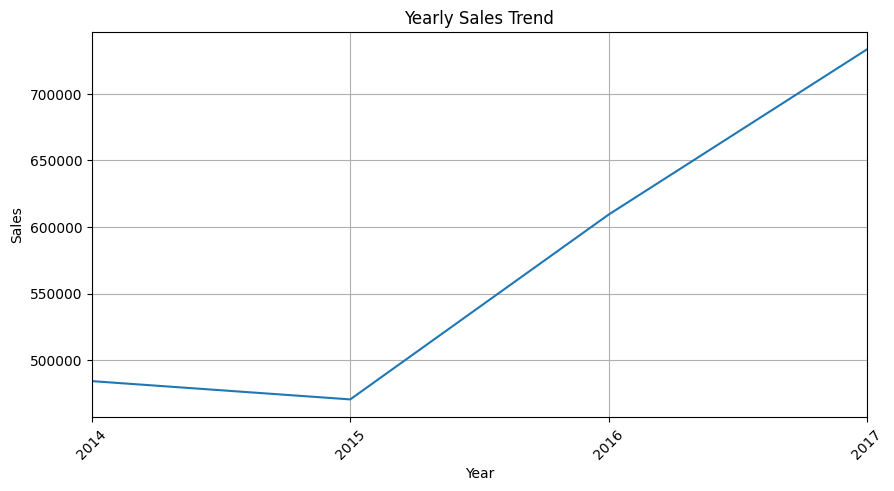

In [32]:
import matplotlib.pyplot as plt

monthly_sales.plot(kind='line', figsize=(10,5), title='Yearly Sales Trend')
plt.ylabel("Sales")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [48]:
import csv

df.to_csv("inspected_superstore.csv",
          index=False,
          quoting=csv.QUOTE_NONNUMERIC,
          quotechar='"',
          escapechar='\\')  # Escapes quotes inside text

In [50]:
for column in df.columns:
    # Check if the column contains any comma in its values
    if df[column].astype(str).str.contains(',').any():
        print(f"Column '{column}' contains commas.")

        # Optionally, display rows where commas are found
        print(df[df[column].astype(str).str.contains(',')][column].head())
        print("----------")



Column 'Product Name' contains commas.
1     Hon Deluxe Fabric Upholstered Stacking Chairs,...
5     Eldon Expressions Wood and Plastic Desk Access...
14    Holmes Replacement Filter for HEPA Air Cleaner...
16    Stur-D-Stor Shelving, Vertical 5-Shelf: 72"H x...
20          Wilson Jones Hanging View Binder, White, 1"
Name: Product Name, dtype: object
----------


In [51]:
df['Product Name'] = df['Product Name'].str.replace(',', '', regex=False)

In [55]:
for column in df.columns:
    # Check if the column contains any comma in its values
    if df[column].astype(str).str.contains(',').any():
        print(f"Column '{column}' contains commas.")

        # Optionally, display rows where commas are found
        print(df[df[column].astype(str).str.contains(',')][column].head())
        print("----------")
    else:
        print("None of the rows have commas")



None of the rows have commas
None of the rows have commas
None of the rows have commas
None of the rows have commas
None of the rows have commas
None of the rows have commas
None of the rows have commas
None of the rows have commas
None of the rows have commas
None of the rows have commas
None of the rows have commas
None of the rows have commas
None of the rows have commas
None of the rows have commas
None of the rows have commas
None of the rows have commas
None of the rows have commas
None of the rows have commas
None of the rows have commas
None of the rows have commas
None of the rows have commas
None of the rows have commas
None of the rows have commas


In [56]:
df.to_csv('inspected_superstore.csv', index=False)


In [57]:
from google.colab import files
files.download("inspected_superstore.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>